<a href="https://colab.research.google.com/github/seohyeon-jeong/basic_machinelearning/blob/main/SMD_BreamAndSmelt_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 다중 분류multi-class classfication with K-NN Classifier
: 타깃 데이터에 2개 이상의 클래스가 포함된 문제 

- 이진 분류처럼 양성 클래스와 음성 클래스를 각각 1과 0으로 지정한 것처럼 타깃값을 숫자로 바꾸어 입력할 수 있지만, 사이킷런에서는 문자열로 된 타깃값을 그대로 사용할 수 있다

- KNeighborsClassifier에서 정렬된 타깃값은 classes_속성에 알파벳순으로 들어있음

- predict_proba() 메서드로 클래스별 확률값을 반환한다



In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
# 특정열에서 고유한 값을 추출
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
# Species를 분류하는 문제 -> Species = target data, 나머지 열들 = input data

# 입력데이터가 될 DataFrame의 열들을 선정해서 넘파이 배열로 바꾸어 저장
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [4]:
# 타깃데이터를 넘파이 배열로 저장
fish_target = fish['Species'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split
# 훈련 셋과 테스트 셋을 랜덤하게 섞어서 테스트셋이 25%가 되게 분할
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [7]:
# K-최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [8]:
# 정렬된 타깃값 출력
print(kn.classes_) # 디폴트 : 알파벳순

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [9]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [10]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) # 소수점 넷째 자리까지 표기 (다섯째 자리에서 반올림) : 디폴트는 소수점 첫번째 자리에서 반올림

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [11]:
# 네번째 샘플의 최근접 이웃의 클래스 확인
distance, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])
# 결과) Roach일 확률이 1/3, Perch일 확률이 2/3 

# 하지만, 최근접이웃은 k개의 개수에 따라서 나올 확률이 0/k, 1/k, 2/k, ...,  k/k로 정해지니 정확한 확률이라고 하긴 좀 어색하다.

[['Roach' 'Perch' 'Perch']]


### 로지스틱 회귀 Logisitic Regression

Y가 범주형 변수일 때 선형 회귀 모델을 사용할 수 없다.   
선형 회귀 모델의 장점은 그대로 유지하되 Y가 범주가 아니라 (0,1) 사이의 값을 가질 확률로 두고 식을 세운 모형  
with 시그모이드 함수sigmoid function = 로지스틱 함수logistic function

시그모이드 함수 : 출력 z의 음수를 사용해 자연상수 e를 거듭제곱하고 1을 더한 값을 역수로 취한다.(z가 무한하게 큰 음수일때 이 함수는 0에 가까워지고, 무한하게 큰 양수가 될 때 1에 가까워 진다. z가 0일 때 0.5) 

- 시그모이드 함수는 하나의 선형 방정식의 출력값을 0~1 사이로 압축 = 이진분류에서 z값을 확률로 변환

- predict_proba() 메서드로 클래스별 확률값을 반환
- classes_ 속성에 타깃값이 알파벳순으로 들어있음
- decision_function()으로 z값 출력 = 양성클래스에 대한 z값  
  = predict_proba() 메서드의 두번째 열의 값
- 분류 확률 : expit(lr.decision_function(훈련 데이터셋))

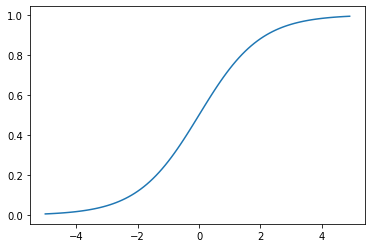

In [12]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z)) # sigmoid function
plt.plot(z, phi)

plt.show()

#### 로지스틱 회귀 : 이진 분류
- 이진 분류의 경우 시그모이드 함수의 출력이 0.5보다 크면 양성, 0.5보다 작으면 음성 클래스로 판단  
(0.5인 경우에는 라이브러리마다 다르지만, 사이킷런은 일단 음성 클래스로 분류)


In [13]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
# 'A'와 'C'만 골라내기 위해 첫 번째와 세 번째 원소만 True이고 나머지 원소는 모두 False인 배열을 전달
print(char_arr[[True, False, True, False, False]]) # 불리언 인데싱boolean indexing

['A' 'C']


In [14]:
# 훈련셋에서 Bream도미와 Smelt빙어의 행만 골라내기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]  # bream_smelt_indexes가 True인 값 인덱싱되어 변수에 저장된다.
target_bream_smelt = train_target[bream_smelt_indexes]

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

# 처음 5개의 샘플 예측
print(lr.predict(train_bream_smelt[:5])) 

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [16]:
# 예측확률은 predict_proba() 메서드에서 확인가능
print(lr.predict_proba(train_bream_smelt[:5])) 
# 출력 결과 = [음성 클래스일 확률, 양성 클래스일 확률] (타깃값 알파벳순으로 할당; 이 경우에는 Bream, Smelt순) 

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [17]:
# 정렬된 타깃값은 classes_속성에 알파벳순으로 들어있음
  # 순서를 변경하려면 Bream인 타깃값을 1로 만들고 나머지 타깃값은 0으로 만들어서 사용하면 됨
print(lr.classes_)

['Bream' 'Smelt']


In [18]:
# 각 설명변수의 계수와 절편값 구하기
print(lr.coef_, lr.intercept_)
# 결과) z = -0.404*(weight) - 0.576*(length)-0.663*(Diagonal) - 1.103*(Height)-0.732*(Width)-2.161

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [20]:
# decision_function()으로 z값 출력 -> 양성클래스에 대한 z값을 반환한다! (predict_proba() 메서드의 두번째 열의 값)
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [21]:
# 분류 확률 : expit(lr.decision_function(훈련 데이터셋)) -> 여기선 양성 클래스로 분류할 확률
  # expit()으로 z값을 시그모이드 함수에 넣어 확률 출력 (np.exp()를 사용해 분수 계산하는것보다 편리하고 안전)
from scipy.special import expit
print(expit(decisions))
# 결과) predict_proba() 메서드의 두번째 열의 값과 동일! 

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


#### 로지스틱 회귀 : 다중 분류

- 반복 횟수  
LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용  
max_iter 매개변수에서 반복 횟수 지정(default=100)  
횟수가 부족하다는 경고가 발생하면 따로 지정

- L2 규제 : 로지스틱 회귀, 릿지 회귀에서의 규제 방법
  * 릿지 회귀 : alpha 매개변수가 커지면 규제도 커짐
  * 로지스틱 회귀 : C의 값이 작을수록 규제가 커짐 (C 기본값 = 1)

- 소프트맥스softmax 함수(= 정규화 지수 함수)를 사용해서 z값을 확률로 변환한다.  
소프트맥스 함수는 여러 개의 선형 방정식의 출력값을 지수함수를 사용해 0~1사이 값으로 압축하고 전체 합이 1이 되도록 만든다. 


In [22]:
lr = LogisticRegression(C=20, max_iter=1000) # 분류하는 그룹이 많으니 규제도 풀어주고, 반복횟수도 늘려준다.
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
# 결과) 과소도 과대적합도 아닌것 같다.

0.9327731092436975
0.925


In [23]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [24]:
# 테스트 셋 처음 5개의 새플에 대한 예측 확률 출력 
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3)) # 출력 간소화를 위해 소숫점 셋째 자리까지 반올림 

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [25]:
# 클래스 정보 확인
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [26]:
print(lr.coef_.shape, lr.intercept_.shape)
# 다중 분류는 클래스마다 z값을 하나씩 계산한다. 그 중에서 가장 높은 z값을 출력하는 클래스가 예측 클래스가 되는 것

(7, 5) (7,)


In [28]:
print(lr.coef_)

[[-1.49002911 -1.02919221  2.59351113  7.70354318 -1.20068079]
 [ 0.19619256 -2.0106062  -3.77982687  6.50490143 -1.99486463]
 [ 3.56278472  6.34361428 -8.48973364 -5.75756295  3.79309039]
 [-0.10458533  3.60316654  3.93067417 -3.61731229 -1.75070607]
 [-1.40059104 -6.07505264  5.25967743 -0.87222909  1.86043657]
 [-1.38528628  1.49217379  1.3922839  -5.67732641 -4.40095877]
 [ 0.62151448 -2.32410356 -0.90658611  1.71598614  3.69368329]]


In [29]:
print(lr.intercept_)

[-0.09204845 -0.26290731  3.25101057 -0.14742485  2.65496057 -6.78780765
  1.38421712]


In [30]:
# decision_function으로 z1~z7까지의 값구하기
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [31]:
# 소프트맥스softmax 함수를 사용해서 z값을 확률로 변환 (이진 분류에서는 sigmoid function)
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
